## Breadth-First Search

`Breadth-First Search` adalah algoritma `Blind/Un-informed Search` karena memang tidak ada informasi yang digunakan dalam proses pencarian. Pencarian menggunakan algoritma BFS ini dilakukan pada semua simpul dalam setiap level secara berurutan dari kiri ke kanan. Jika pada level pertama tidak ditemukan solusi maka akan diteruskan kepada level berikutnya.

BFS adalah _complete_ dan _optimal_ tetapi BFS harus menyimpan semua simpul yang pernah dibangkitkan. Misalkan, untuk $b$ = 10 dan $d$ = 8, maka kita harus membangkitkan dan menyimpan sebanyak $10^0 + 10^1 + 10^2 + 10^3 + 10^4 + 10^5 + 10^6 + 10^7 + 10^8 = 111.111.111.$

Cara Kerja Algoritma BFS :

```
1. Masukkan simpul ujung (akar) ke dalam antrian.
2. Ambil simpul dari awal antrian, lalu cek apakah simpul merupakan solusi.
3. Jika simpul merupakan solusi, pencarian selesai dan hasil dikembalikan.
4. Jika simpul bukan solusi, masukkan seluruh simpul yang bertetangga dengan simpul tersebut (simpul anak) ke dalam antrian.
5. Jika antrian kosong dan setiap simpul sudah dicek, pencarian selesai dan mengembalikan hasil solusi tidak ditemukan.
6. Ulangi pencarian dari langkah kedua.
Singkatnya, misal ada antrian A D F H, maka dalam bfs yang diambil terlebih dahulu adalah A.
```

Referensi: [https://student.blog.dinus.ac.id/agustintyaz/2017/04/26/bfsbreatdh-first-search-dan-dfsdepth-first-search/]

In [21]:
def bfs (graf, mulai, tujuan):
    queue = [[mulai]]
    visited = set()
    
    while queue:
        
        jalur = queue.pop(0)
        print(f"Jalur yang sekarang dilewati : {jalur}")
        state = jalur[-1]
        print(f"Penyimpanan jalur visited : {visited}")
        if state == tujuan: #Jika simpul adalah solusi, maka akan mengembalikan solusi sekarang
            print(f"Jalur sekarang ({state}) == tujuan ({tujuan})")
            return jalur
        elif state not in visited:
            print(f"Jalur sekarang belum optimal ({state} != {tujuan})\n")
            for cabang in graf.get(state, []):
                jalur_baru = list(jalur)
                jalur_baru.append(cabang)
                queue.append(jalur_baru)
                
            visited.add(state)
        else:
            print(f"Jalur {state} ada di tempat yang sudah di visited yaitu {visited}\n")
            
        isi = len(queue)
        if isi == 0:
            print("Tidak ditemukan")

In [22]:
graf = {'A':set(['B', 'C']),
       'B':set(['A']),
       'C':set(['A', 'D', 'E', 'F']),
       'D':set(['C', 'G', 'H']),
       'E':set(['C', 'F', 'I']),
       'F':set(['C', 'E', 'K']),
       'G':set(['D', 'H', 'I']),
       'H':set(['D', 'G']),
       'I':set(['E', 'G', 'J']),
       'J':set(['I', 'L']),
       'K':set(['F', 'L']),
       'L':set(['K', 'J'])}

In [23]:
bfs(graf, 'A', 'J')

Jalur yang sekarang dilewati : ['A']
Penyimpanan jalur visited : set()
Jalur sekarang belum optimal (A != J)

Jalur yang sekarang dilewati : ['A', 'B']
Penyimpanan jalur visited : {'A'}
Jalur sekarang belum optimal (B != J)

Jalur yang sekarang dilewati : ['A', 'C']
Penyimpanan jalur visited : {'A', 'B'}
Jalur sekarang belum optimal (C != J)

Jalur yang sekarang dilewati : ['A', 'B', 'A']
Penyimpanan jalur visited : {'A', 'B', 'C'}
Jalur A ada di tempat yang sudah di visited yaitu {'A', 'B', 'C'}

Jalur yang sekarang dilewati : ['A', 'C', 'E']
Penyimpanan jalur visited : {'A', 'B', 'C'}
Jalur sekarang belum optimal (E != J)

Jalur yang sekarang dilewati : ['A', 'C', 'F']
Penyimpanan jalur visited : {'E', 'A', 'B', 'C'}
Jalur sekarang belum optimal (F != J)

Jalur yang sekarang dilewati : ['A', 'C', 'A']
Penyimpanan jalur visited : {'A', 'E', 'F', 'B', 'C'}
Jalur A ada di tempat yang sudah di visited yaitu {'A', 'E', 'F', 'B', 'C'}

Jalur yang sekarang dilewati : ['A', 'C', 'D']
Penyimp

['A', 'C', 'E', 'I', 'J']

# Visualisasi Node

In [43]:
from itertools import combinations
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
d = {'A':['B', 'C'],
       'B':['A'],
       'C':['A', 'D', 'E', 'F'],
       'D':['C', 'G', 'H'],
       'E':['C', 'F', 'I'],
       'F':['C', 'E', 'K'],
       'G':['D', 'H', 'I'],
       'H':['D', 'G'],
       'I':['E', 'G', 'J'],
       'J':['I', 'L'],
       'K':['F', 'L'],
       'L':['K', 'J']}

In [54]:
combos = list(combinations(d.keys(), 2))
edge_lst = [(combo[0],
          combo[1],
          len(set(d[combo[0]]) & set(d[combo[1]])))
         for combo in combos if len(set(d[combo[0]]) & set(d[combo[1]])) > 0]

g = nx.Graph()
g.add_nodes_from(d)
g.add_weighted_edges_from(edge_lst)

In [55]:
edge_lst

[('A', 'D', 1),
 ('A', 'E', 1),
 ('A', 'F', 1),
 ('B', 'C', 1),
 ('C', 'E', 1),
 ('C', 'F', 1),
 ('C', 'G', 1),
 ('C', 'H', 1),
 ('C', 'I', 1),
 ('C', 'K', 1),
 ('D', 'E', 1),
 ('D', 'F', 1),
 ('D', 'G', 1),
 ('D', 'H', 1),
 ('D', 'I', 1),
 ('E', 'F', 1),
 ('E', 'G', 1),
 ('E', 'J', 1),
 ('E', 'K', 1),
 ('F', 'I', 1),
 ('F', 'L', 1),
 ('G', 'H', 1),
 ('G', 'J', 1),
 ('H', 'I', 1),
 ('I', 'L', 1),
 ('J', 'K', 1)]

In [56]:
g.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'))

In [57]:
g.edges(data=True)

EdgeDataView([('A', 'D', {'weight': 1}), ('A', 'E', {'weight': 1}), ('A', 'F', {'weight': 1}), ('B', 'C', {'weight': 1}), ('C', 'E', {'weight': 1}), ('C', 'F', {'weight': 1}), ('C', 'G', {'weight': 1}), ('C', 'H', {'weight': 1}), ('C', 'I', {'weight': 1}), ('C', 'K', {'weight': 1}), ('D', 'E', {'weight': 1}), ('D', 'F', {'weight': 1}), ('D', 'G', {'weight': 1}), ('D', 'H', {'weight': 1}), ('D', 'I', {'weight': 1}), ('E', 'F', {'weight': 1}), ('E', 'G', {'weight': 1}), ('E', 'J', {'weight': 1}), ('E', 'K', {'weight': 1}), ('F', 'I', {'weight': 1}), ('F', 'L', {'weight': 1}), ('G', 'H', {'weight': 1}), ('G', 'J', {'weight': 1}), ('H', 'I', {'weight': 1}), ('I', 'L', {'weight': 1}), ('J', 'K', {'weight': 1})])

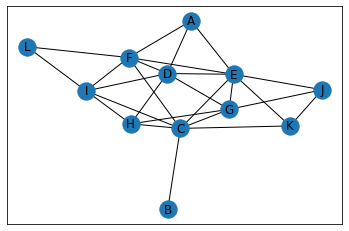

In [58]:
pos = nx.spring_layout(g)
edgewidth = [g[u][v]['weight'] for u, v in g.edges()]
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos, width=edgewidth)
nx.draw_networkx_labels(g, pos)
plt.show()